
# **📊 Mobile Price Classification with Machine Learning**

In this notebook, we will explore and apply machine learning techniques to classify mobile phones into different price ranges based on their features. 

We'll follow these main steps:
1. **Data Exploration**: We'll start by loading the dataset and inspecting the data to check for missing values, understand the distribution of the target variable (`price_range`), and explore the features.
2. **Data Preprocessing**: This includes scaling the features to make sure the data is ready for training.
3. **Model Training**: We'll train several machine learning models like **Logistic Regression**, **Random Forest**, **Support Vector Machine (SVM)**, and **XGBoost.**
4. **Model Evaluation**: Finally, we'll evaluate the performance of our models using accuracy, classification reports, and confusion matrices.

By the end of this notebook, you will have a better understanding of how to use various machine learning algorithms for classification tasks, and how to visualize the results.

---

### **Steps:**
- **Step 1: Data Preprocessing**: Cleaning the data and scaling it for better model performance.
- **Step 2: Model Training**: Trying different models like Logistic Regression, Random Forest, SVM, and XGBoost.
- **Step 3: Evaluation**: Assessing model performance using accuracy and confusion matrices.

# 🔧 Importing Necessary Libraries

In [1]:
# Data manipulation and handling
import numpy as np 
import pandas as pd 

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Handling missing values
import missingno as msno 

# Scaling data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Machine Learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
import xgboost as xgb

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# read dataset(train)

In [2]:
df_train  = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")

# read dataset(test)

In [3]:
df_test = pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")

In [4]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df_train["price_range"].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

## 📊 Visualizing the Price Range Distribution
In this part, we're visualizing the distribution of the target variable, which is the price range of the mobile phones in our dataset. This will help us understand how the data is spread across different price categories.

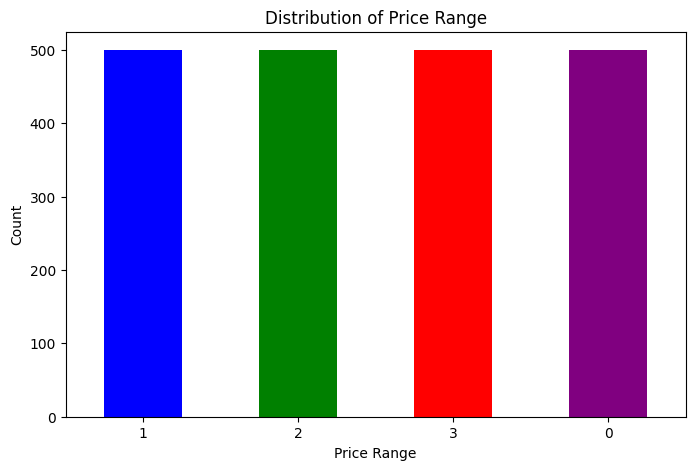

In [6]:
price_counts = df_train["price_range"].value_counts()

plt.figure(figsize=(8, 5))
price_counts.plot(kind="bar", color=["blue", "green", "red", "purple"]) 
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.title("Distribution of Price Range")
plt.xticks(rotation=0)  
plt.show()


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df_train.shape

(2000, 21)

## 🔍 Visualizing Missing Values
In this part, we're using a visualization tool to identify any missing values in the dataset. It's important to check for missing data because it can affect the performance of machine learning models.

Text(0.5, 1.0, 'Missing Values')

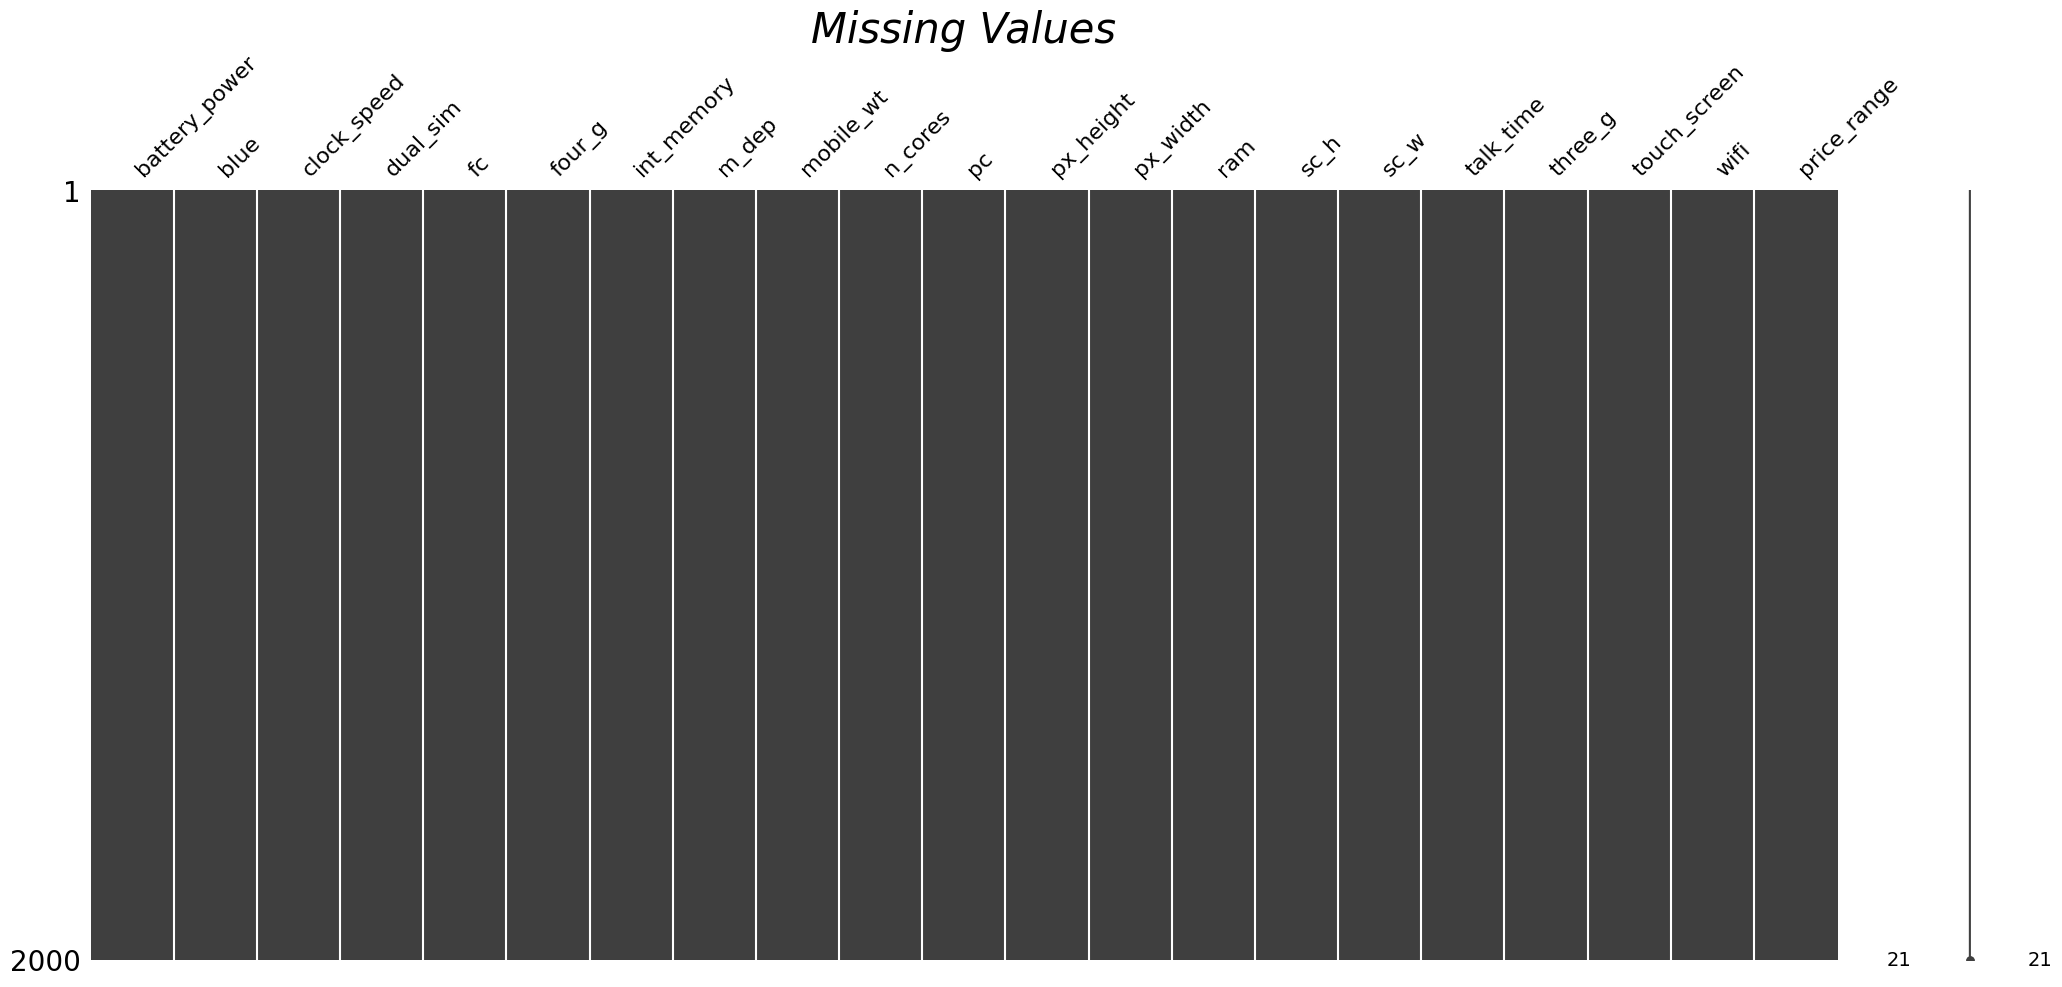

In [9]:
msno.matrix(df_train).set_title("Missing Values", fontsize=30, fontstyle="oblique")

In [10]:
df_train.isna().sum().sum()

0

## 📊 Descriptive Statistics with a Visual Twist
In this part, we're generating a summary of the dataset's numerical features. This gives us an overview of key statistics such as the mean, minimum, maximum, and standard deviation for each feature.

In [11]:
df_train.describe().T.style.background_gradient(low=0.2, high=0.5, cmap="rocket_r")


,count,mean,std,min,25%,50%,75%,max
battery_power,2000.000000,1238.518500,439.418206,501.000000,851.750000,1226.000000,1615.250000,1998.000000
blue,2000.000000,0.495000,0.500100,0.000000,0.000000,0.000000,1.000000,1.000000
clock_speed,2000.000000,1.522250,0.816004,0.500000,0.700000,1.500000,2.200000,3.000000
dual_sim,2000.000000,0.509500,0.500035,0.000000,0.000000,1.000000,1.000000,1.000000
fc,2000.000000,4.309500,4.341444,0.000000,1.000000,3.000000,7.000000,19.000000
four_g,2000.000000,0.521500,0.499662,0.000000,0.000000,1.000000,1.000000,1.000000
int_memory,2000.000000,32.046500,18.145715,2.000000,16.000000,32.000000,48.000000,64.000000
m_dep,2000.000000,0.501750,0.288416,0.100000,0.200000,0.500000,0.800000,1.000000
mobile_wt,2000.000000,140.249000,35.399655,80.000000,109.000000,141.000000,170.000000,200.000000
n_cores,2000.000000,4.520500,2.287837,1.000000,3.000000,4.000000,7.000000,8.000000


 ## The data has been split into features (X) and target (y) for training preparation.

In [12]:
X = df_train.drop(columns=['price_range'])  # Features
y = df_train['price_range']  # Target Variable

In [13]:
 X_column = X.columns

In [14]:
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44,  stratify=y)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1800, 20)
X_test shape is  (200, 20)
y_train shape is  (1800,)
y_test shape is  (200,)


In [15]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
scaled_df = pd.DataFrame(X, columns=X_column)
#showing data


In [16]:
scaled_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,-1.305750,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,-0.645989,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,-0.645989,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,-0.151168,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,0.673534,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099


#  The algorithms for training:
 - **1. Logistic Regression**,
- **2. Random Forest**, 
- **3. Support Vector Machine (SVM)**,
- **4. XGBoost.**

# 1. Logistic Regression¶

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

log_Reg = LogisticRegression(multi_class='ovr', solver='liblinear')
log_Reg.fit(X_train, y_train)
y_pred_log = log_Reg.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)
log_acc

0.805

# 2. Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_acc

0.885

# 3. Support Vector Machine (SVM)

In [19]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, y_pred_svm)
svm_acc

0.975

#  4. XGBoost Classifier

In [20]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, y_pred_xgb)
xgb_acc

0.905

# Evaluate Models

In [21]:
print(f"Logistic Regression Accuracy: {log_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")
print(f"SVM Accuracy: {svm_acc:.2f}")
print(f"XGBoost Accuracy: {xgb_acc:.2f}")

Logistic Regression Accuracy: 0.81
Random Forest Accuracy: 0.89
SVM Accuracy: 0.97
XGBoost Accuracy: 0.91


# Confusion Matrix for Random Forest

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

best_model = svm_model  # Assuming  is best for this case
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.96      0.96      0.96        50
           2       0.94      0.98      0.96        50
           3       1.00      0.98      0.99        50

    accuracy                           0.97       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.98      0.97      0.98       200



# Plot Confusion Matrix

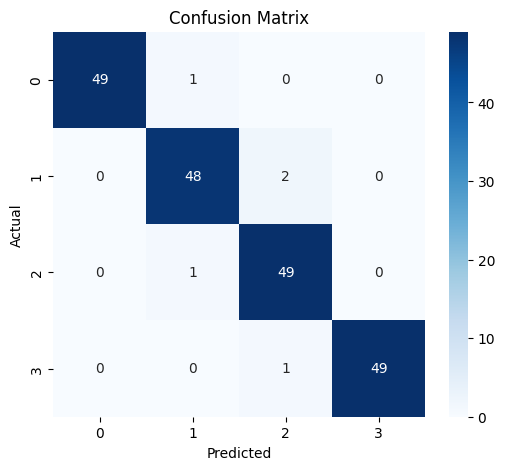

In [23]:
plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()